<a href="https://colab.research.google.com/github/PaulMRivera/Computational_physics/blob/master/Activity_5/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Calculo de las estacionalidad, tendencia y residuo 
import statsmodels.api as sm

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Tomar la dirección URL del archivo
url = 'https://raw.githubusercontent.com/carloslizarragac/FisicaComputacional1/master/Eval1/data/co2_smo_DailyData.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

#Copia de respaldo
df_work0 = df_dist.copy()

#Cambiar los valores "Nulo" por un campo vacio
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

#Convertir los valores de las distintas variables a números flotantes flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

#Creacion dataframe en caso de regresarse
df_work2 = df_work1.copy()

#Cambio de formato para la columna Fecha a un formato de fecha que comprende Python
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

#Función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.strftime('%b')

#Creasion de nuestro punto de partida
df_meteo = df_work2.copy()


In [ ]:
#Copia del último DataFrame df_meteo y crea un DataFrame df_meteo_ts
df_meteo_ts = df_meteo.copy()

#Reemplazo el índice por la variable 'Fecha' 
df_meteo_ts = df_meteo_ts.set_index('Fecha')

#Conjunto de 30 y 17 años dado que son los registrados por la estacion  
df_r = df_meteo_ts[(df_meteo_ts['Año'] >= 1961) & (df_meteo_ts['Año'] < 2078)]
df_30 = df_meteo_ts[(df_meteo_ts['Año'] >= 1978) & (df_meteo_ts['Año'] < 2009)]
#Conjunto de 1990 hasta el fin de los datos
df_90 = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2009)]
#conjuntos de 24 años para comparacion
df_1 = df_meteo_ts[(df_meteo_ts['Año'] >= 1961) & (df_meteo_ts['Año'] < 2085)]
df_2 = df_meteo_ts[(df_meteo_ts['Año'] >= 1985) & (df_meteo_ts['Año'] < 2009)]

Text(0.5, 1.0, 'Inventario de Datos 1978-2008, Puerto Libertad SON')

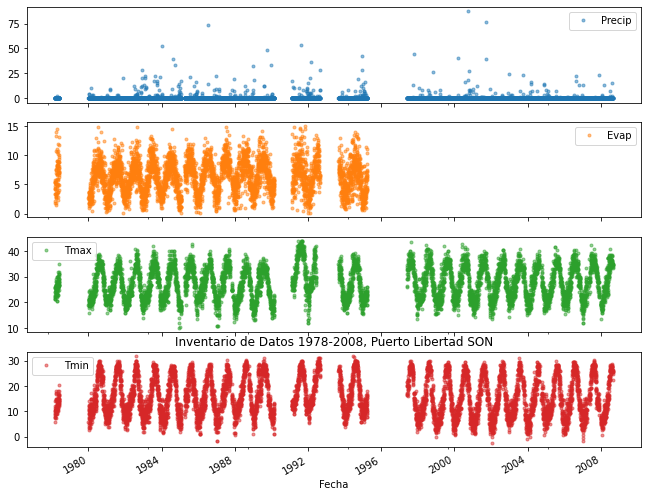

In [ ]:
#Visualización la colección del intervalo de 30 años para ver si hay datos faltantes
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax °C', 'Tmin (°C)']
axes = df_30[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1978-2008, Puerto Libertad SON')

**Actividad 1** 


Exploracion de Precipitación los últimos años 1990 a fin de datos

Text(0.5, 1.0, 'Precipitacion 1990-2008 Puerto Libertad SON')

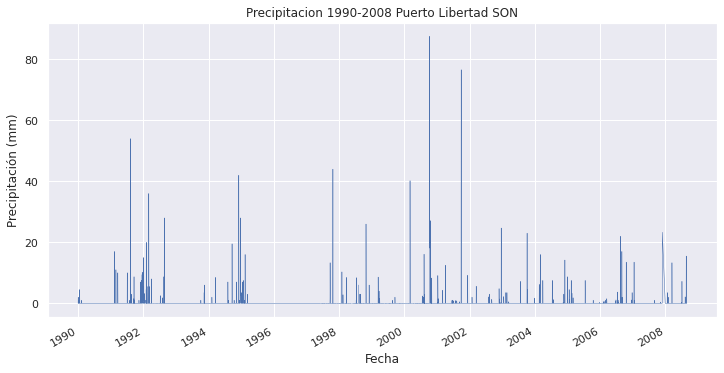

In [ ]:
#Grafica del rango 30 años de datos
sns.set(rc={'figure.figsize':(12, 6)})
df_90['Precip'].plot(linewidth=0.5)
plt.ylabel('Precipitación (mm)')
plt.title('Precipitacion 1990-2008 Puerto Libertad SON')


Text(0.5, 1.0, 'Precipitacion 1994 Puerto Libertad SON')

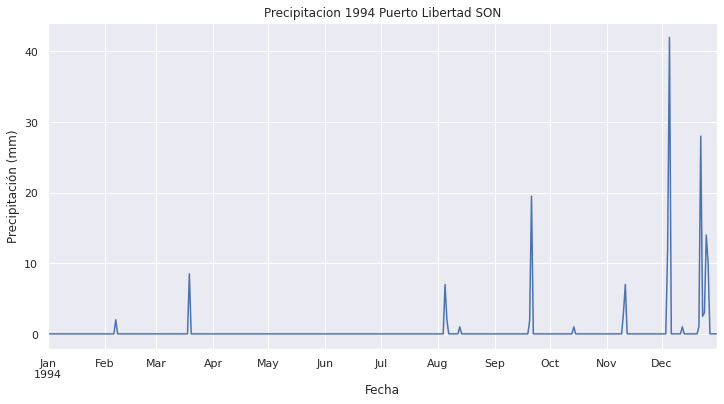

In [ ]:
#Investigando un año de datos
ax = df_30.loc['1994', 'Precip'].plot()
ax.set_ylabel('Precipitación (mm)')
plt.title('Precipitacion 1994 Puerto Libertad SON')

Text(0.5, 1.0, 'Precipitación Promedio y barras de error para Puerto Libertad SON')

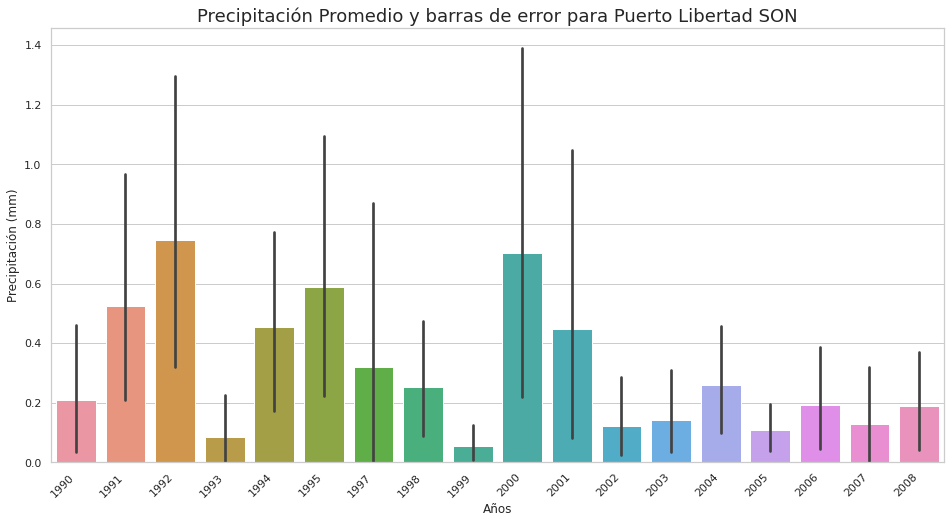

In [ ]:
#Gráfica de Precipitación 1990 en adelante
sns.set_style('whitegrid')

#Tamaño de la gráfica
plt.figure(figsize=(16,8))

#Grafica de los datos usando la columna 'Año' en el eje x
g =sns.barplot(x='Año', y='Precip', data=df_90);

#Rotacion de 45°  en los Años del eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Puerto Libertad SON', fontsize=18)

**Actividad 2**

Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas.

*Se empezara en el 1978 para alcanzar un intervalo de 30 años para el estudio, dado que se dejo de tomar registros en 2008*

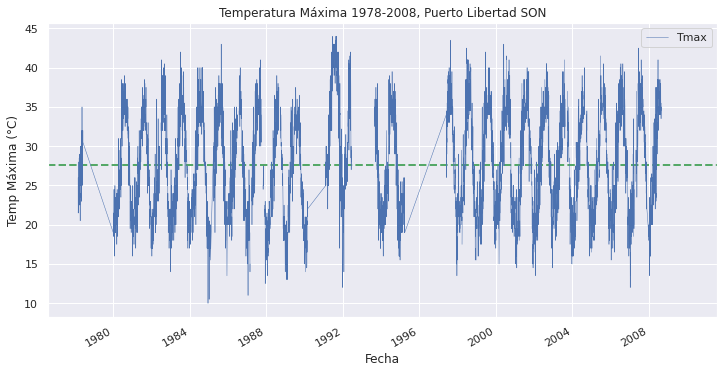

In [ ]:
#Grafica de la Temperatura maxima de 1978 hasta 2008

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

#Cálculo de promedios
Tmax_ave_30 = df_30.Tmax.mean()

#Graficar línea de promedio
plt.axhline(Tmax_ave_30, color = 'g', linestyle='--', linewidth=2)

#Graficar la Temperatura
df_30['Tmax'].plot(linewidth=0.5)
plt.ylabel('Temp Máxima (°C)')
plt.title('Temperatura Máxima 1978-2008, Puerto Libertad SON')

plt.legend()

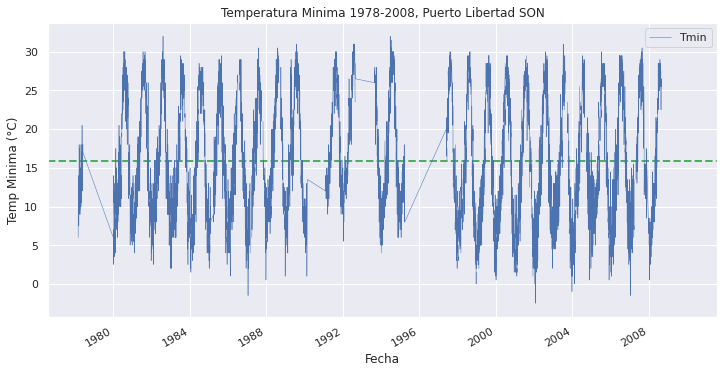

In [ ]:
#Grafica de la Temperatura minima de 1978 hasta 2008

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

#Cálculo de promedios
Tmin_ave_30 = df_30.Tmin.mean()

#Graficar línea de promedio
plt.axhline(Tmin_ave_30, color = 'g', linestyle='--', linewidth=2)

#Graficar la Temperatura
df_30['Tmin'].plot(linewidth=0.5)
plt.ylabel('Temp Minima (°C)')
plt.title('Temperatura Minima 1978-2008, Puerto Libertad SON')

plt.legend()

Text(0.5, 1.0, 'Temperatura Máxima en el año 1994, Puerto Libertad SON')

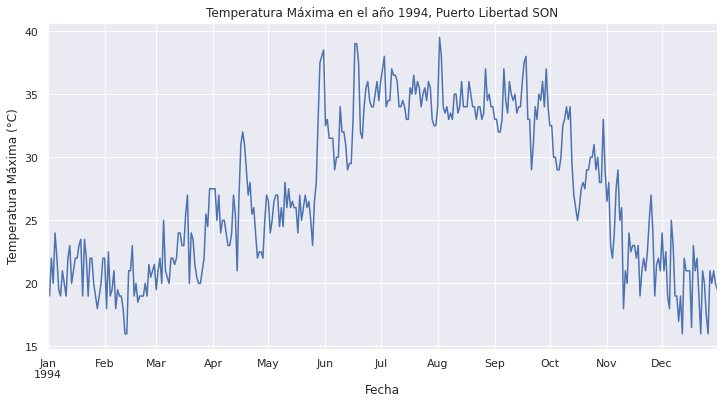

In [ ]:
#Investigando un año de datos
ax = df_30.loc['1994', 'Tmax'].plot()
ax.set_ylabel('Temperatura Máxima (°C)')
plt.title('Temperatura Máxima en el año 1994, Puerto Libertad SON')

Text(0.5, 1.0, 'Temperatura Minima en el año 1994, Puerto Libertad SON')

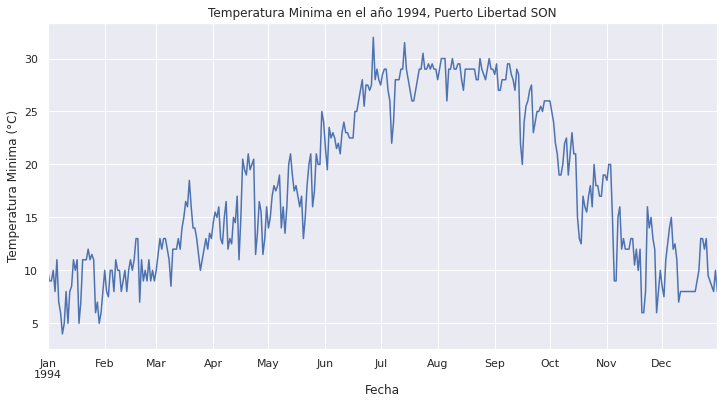

In [ ]:
#Investigando un año de datos
ax = df_30.loc['1994', 'Tmin'].plot()
ax.set_ylabel('Temperatura Minima (°C)')
plt.title('Temperatura Minima en el año 1994, Puerto Libertad SON')

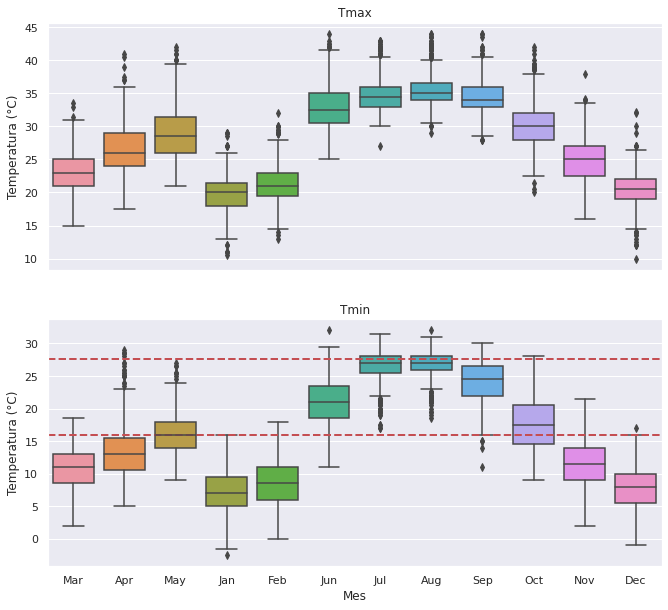

In [ ]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.
# Dos gráficas en una
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)

# Promedio de Tmax y Tmin
Tmax_ave = df_30.Tmax.mean()
Tmin_ave = df_30.Tmin.mean()


for name, ax in zip(['Tmax', 'Tmin'], axes, ):
  sns.boxplot(data=df_30, x='Mes', y=name, ax=ax)
  ax.set_ylabel('Temperatura (°C)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

# Linea de promedio 
plt.axhline(Tmax_ave,color = 'r', linestyle='--', linewidth=2)
plt.axhline(Tmin_ave, color = 'r', linestyle='--', linewidth=2)





**Actividad 3**

Explora tus datos de evaporación de los últimos 30 años datos a partir de 1990.

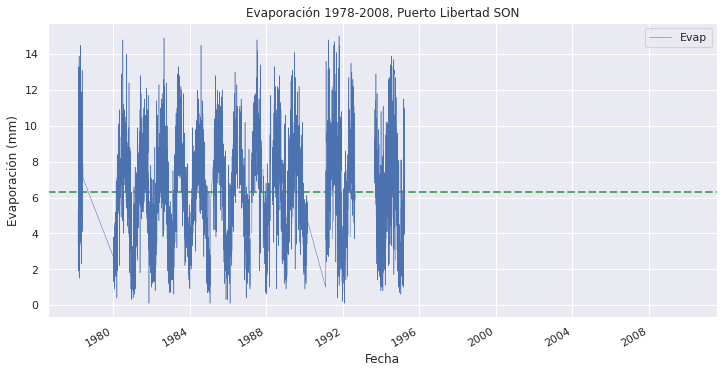

In [ ]:
#Grafica de la Evaporación de 1978 hasta 2008

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

#Cálculo de promedios
Evap_ave_30 = df_30.Evap.mean()

#Graficar línea de promedio
plt.axhline(Evap_ave_30, color = 'g', linestyle='--', linewidth=2)

#Graficar la Temperatura
df_30['Evap'].plot(linewidth=0.5)
plt.ylabel('Evaporación (mm)')
plt.title('Evaporación 1978-2008, Puerto Libertad SON')

plt.legend()

Text(0.5, 1.0, 'Evaporación en el año 1984, Puerto Libertad SON')

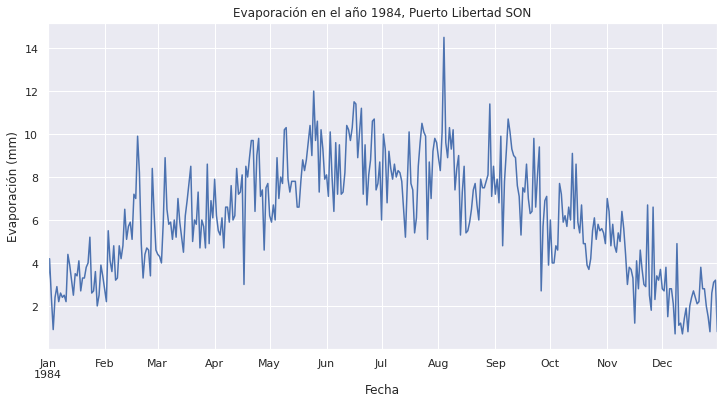

In [ ]:
#Investigando un año de datos
ax = df_30.loc['1984', 'Evap'].plot()
ax.set_ylabel('Evaporación (mm)')
plt.title('Evaporación en el año 1984, Puerto Libertad SON')

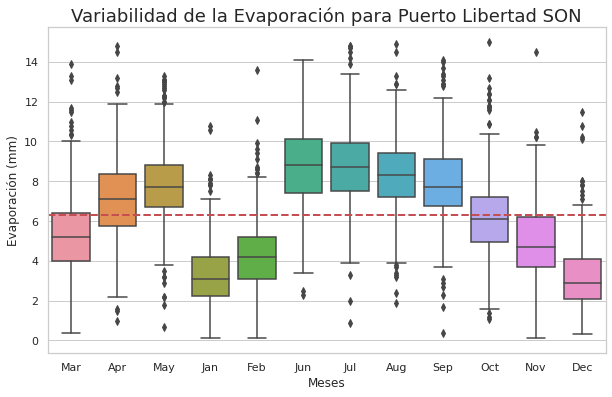

In [ ]:
#Gráfica de Evaporacion en 1978-2008 Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

#Promedio
Evap_ave = df_30.Evap.mean()

#Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Evap', data=df_30)

#Linea de promedio 
plt.axhline(Evap_ave, color = 'r', linestyle='--', linewidth=2)

plt.xlabel('Meses')
plt.ylabel('Evaporación (mm)')
plt.title('Variabilidad de la Evaporación para Puerto Libertad SON', fontsize=18)

plt.show()


**Actividad 4**

Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, utilizando la función *df.rolling()*. Explora tus datos.

In [ ]:
#Creacion de los DataFrame para cada caso de estudio
data_cols = ['Evap', 'Tmax', 'Tmin']
df_30_7d = df_30[data_cols].rolling(7, center=True).mean()
df_30_30d = df_30[data_cols].rolling(30, center=True).mean()
df_30_365d = df_30[data_cols].rolling(365, center=True).mean()

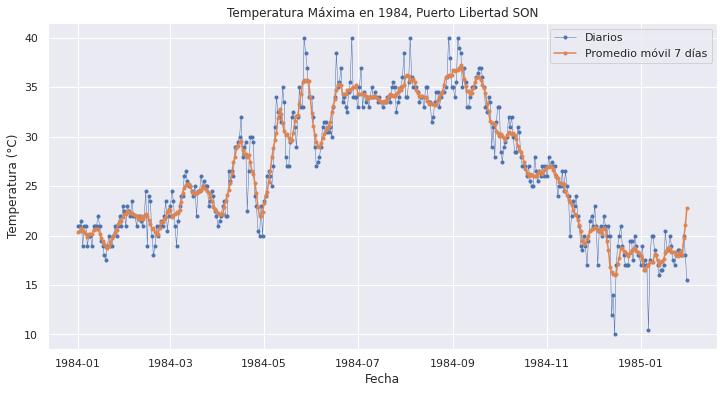

In [ ]:
#Fechas de inicio y fin
start, end = '1984-01', '1985-01'

#Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_30.loc[start:end, 'Tmax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_30_7d.loc[start:end, 'Tmax'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperatura Máxima en 1984, Puerto Libertad SON')
ax.legend()

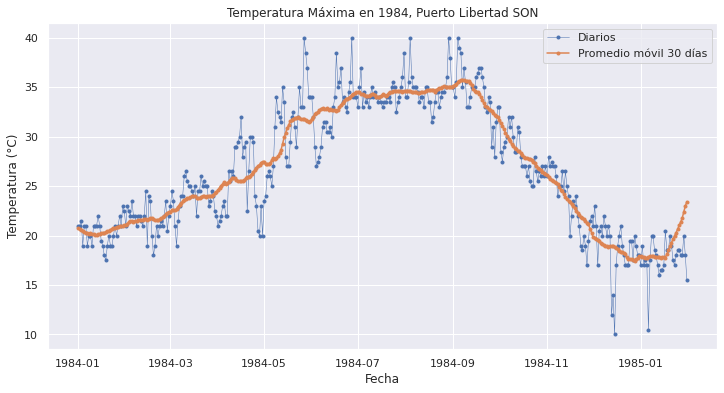

In [ ]:
#Fechas de inicio y fin
start, end = '1984-01', '1985-01'

#Contraste de la gráfica de datos diarios y la de promedio móvil de 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_30.loc[start:end, 'Tmax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_30_30d.loc[start:end, 'Tmax'], marker='.', linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperatura Máxima en 1984, Puerto Libertad SON')
ax.legend()

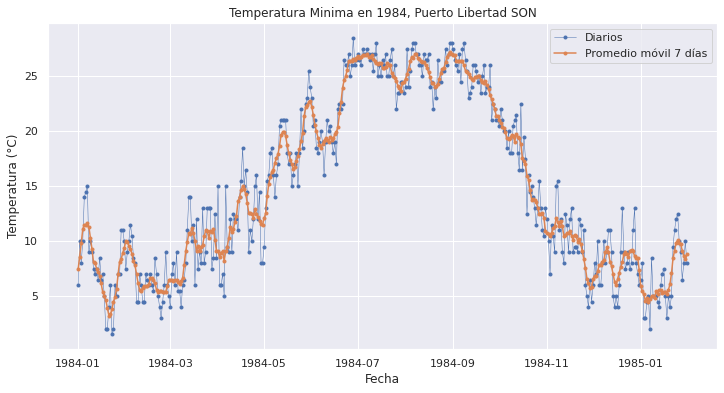

In [ ]:
#Fechas de inicio y fin
start, end = '1984-01', '1985-01'

#Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_30.loc[start:end, 'Tmin'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_30_7d.loc[start:end, 'Tmin'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperatura Minima en 1984, Puerto Libertad SON')
ax.legend()

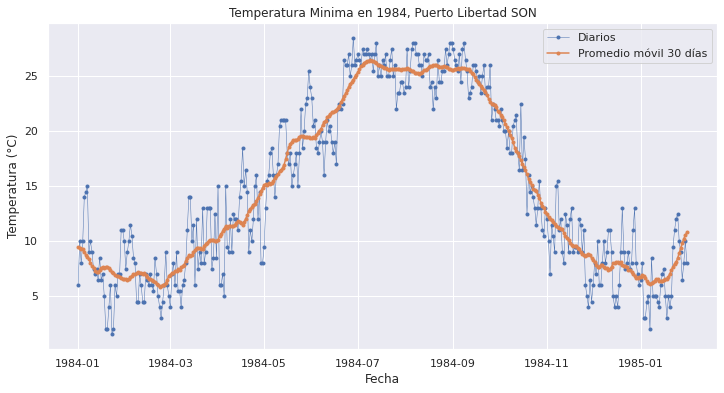

In [ ]:
#Fechas de inicio y fin
start, end = '1984-01', '1985-01'

#Contraste de la gráfica de datos diarios y la de promedio móvil de 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_30.loc[start:end, 'Tmin'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_30_30d.loc[start:end, 'Tmin'], marker='.', linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperatura Minima en 1984, Puerto Libertad SON')
ax.legend()

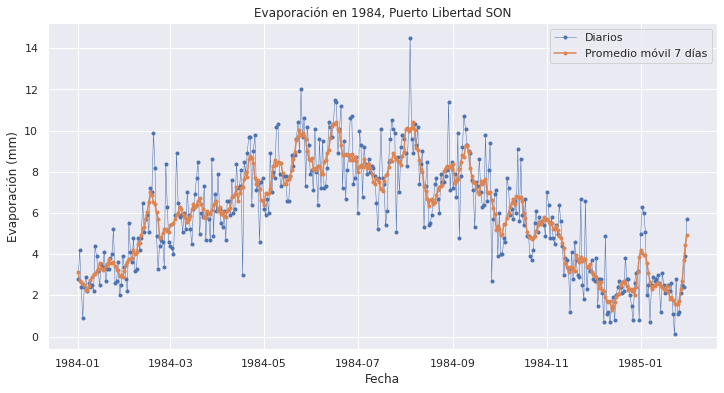

In [ ]:
#Fechas de inicio y fin
start, end = '1984-01', '1985-01'

#Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_30.loc[start:end, 'Evap'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_30_7d.loc[start:end, 'Evap'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evaporación (mm)')
ax.set_title('Evaporación en 1984, Puerto Libertad SON')
ax.legend()

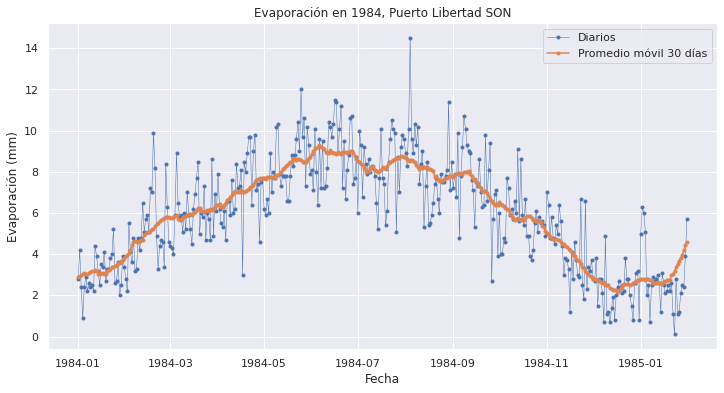

In [ ]:
#Fechas de inicio y fin
start, end = '1984-01', '1985-01'

#Contraste de la gráfica de datos diarios y la de promedio móvil de 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_30.loc[start:end, 'Evap'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_30_30d.loc[start:end, 'Evap'], marker='.', linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evaporación (mm)')
ax.set_title('Evaporación en 1984, Puerto Libertad SON')
ax.legend()

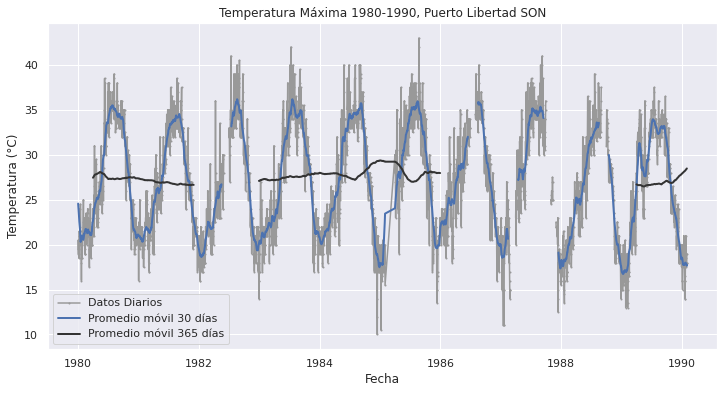

In [ ]:
#Contraste de promedios moviles
#Fechas de inicio y fin
start, end = '1980-01', '1990-01'

#Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_30.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_30_30d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_30_365d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperatura Máxima 1980-1990, Puerto Libertad SON')
ax.legend()

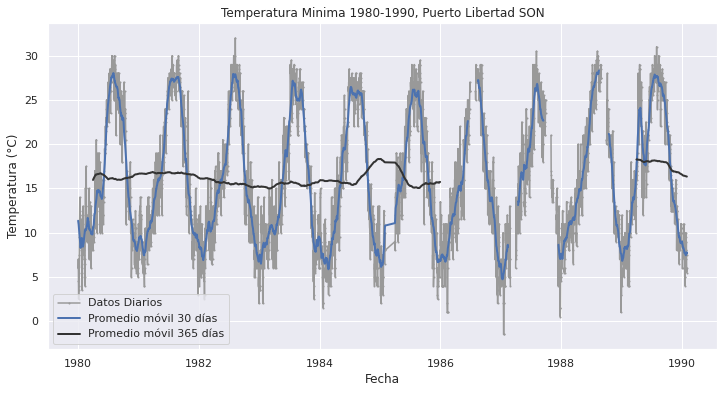

In [ ]:
#Contraste de promedios moviles
#Fechas de inicio y fin
start, end = '1980-01', '1990-01'

#Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_30.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_30_30d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_30_365d.loc[start:end, 'Tmin'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperatura Minima 1980-1990, Puerto Libertad SON')
ax.legend()

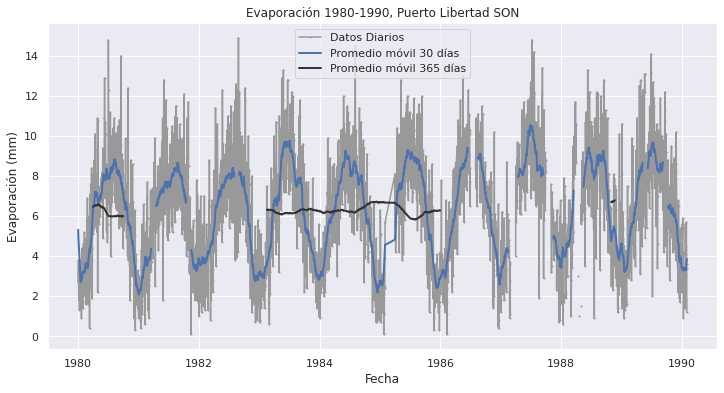

In [ ]:
#Contraste de promedios moviles
#Fechas de inicio y fin
start, end = '1980-01', '1990-01'

#Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_30.loc[start:end, 'Evap'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_30_30d.loc[start:end, 'Evap'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_30_365d.loc[start:end, 'Evap'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evaporación (mm)')
ax.set_title('Evaporación 1980-1990, Puerto Libertad SON')
ax.legend()

**Actividad 5**

Utiliza la biblioteca statsmodels.tsa de Python, para realizar una descomposición de una serie de tiempo: Serie Observada = Tendencia + Estacionalidad + Residuo.

Text(0.5, 1.0, 'Descomposición Aditiva de Temperatura Máxima (promedio Móvil 365 días)')

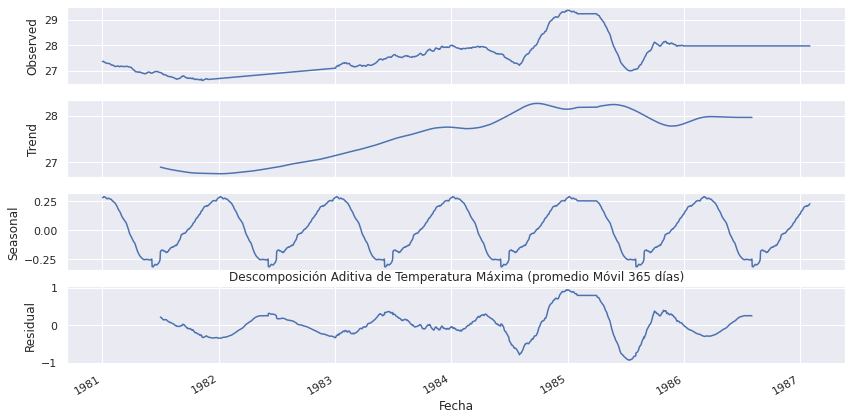

In [ ]:
#Caso: Uso de datos con promedio móvil de 365 días.
#Descomposición de Series de Tiempo 
#Uso de la biblioteca 'statsmodel' (agregada en la celda 1)

#Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

#Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1981-01', '1987-01'

#Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

#Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_30_365d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Máxima (promedio Móvil 365 días)')

Text(0.5, 1.0, 'Descomposición Aditiva de Temperatura Máxima (promedio Móvil 30 días)')

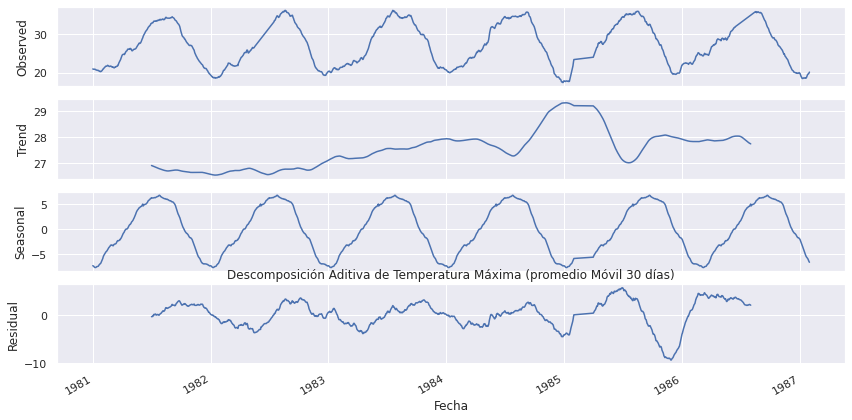

In [ ]:
#Caso: Uso de datos con promedio móvil de 30 días.
#Descomposición de Series de Tiempo 
#Uso de la biblioteca 'statsmodel' (agregada en la celda 1)

#Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

#Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1981-01', '1987-01'

#Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

#Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_30_30d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Máxima (promedio Móvil 30 días)')

Text(0.5, 1.0, 'Descomposición Aditiva de Temperatura Máxima (promedio Móvil diario)')

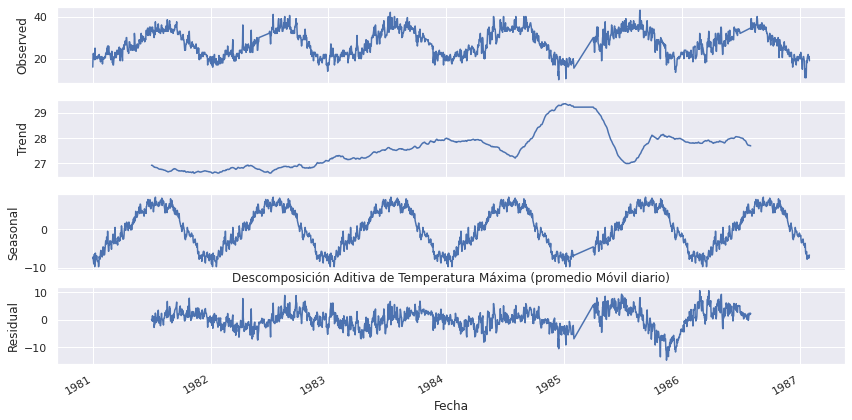

In [ ]:
##Caso: Uso de datos con promedio móvil diario.
#Descomposición de Series de Tiempo 
#Uso de la biblioteca 'statsmodel' (agregada en la celda 1)

#Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

#Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1981-01', '1987-01'

#Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

#Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_30.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Máxima (promedio Móvil diario)')

Text(0.5, 1.0, 'Descomposición Aditiva de Temperatura Minima (promedio Móvil 365 días)')

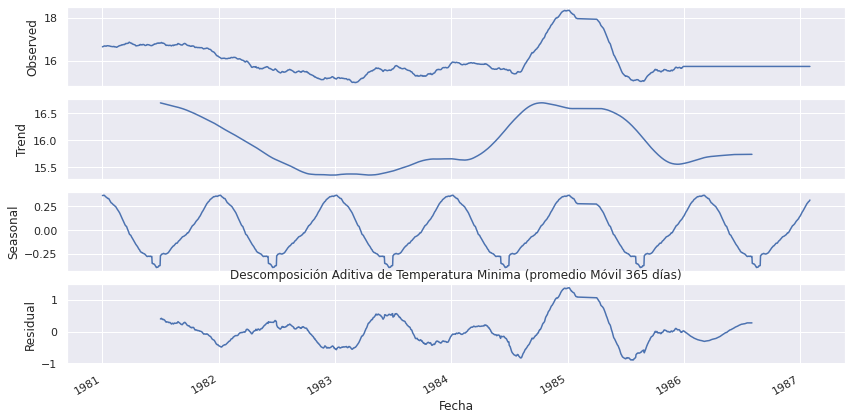

In [ ]:
#Caso: Uso de datos con promedio móvil de 365 días.
#Descomposición de Series de Tiempo 
#Uso de la biblioteca 'statsmodel' (agregada en la celda 1)

#Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

#Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1981-01', '1987-01'

#Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

#Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_30_365d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Minima (promedio Móvil 365 días)')

Text(0.5, 1.0, 'Descomposición Aditiva de Temperatura Minima (promedio Móvil 30 días)')

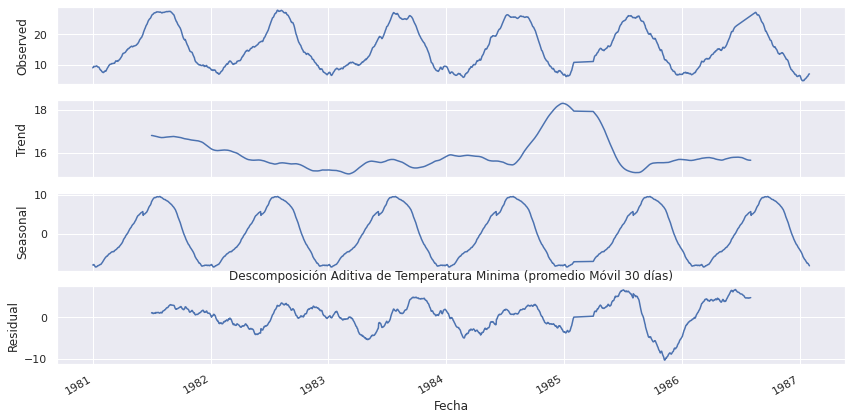

In [ ]:
#Caso: Uso de datos con promedio móvil de 30 días.
#Descomposición de Series de Tiempo 
#Uso de la biblioteca 'statsmodel' (agregada en la celda 1)

#Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

#Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1981-01', '1987-01'

#Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

#Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_30_30d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Minima (promedio Móvil 30 días)')

Text(0.5, 1.0, 'Descomposición Aditiva de Temperatura Minima (promedio Móvil diario)')

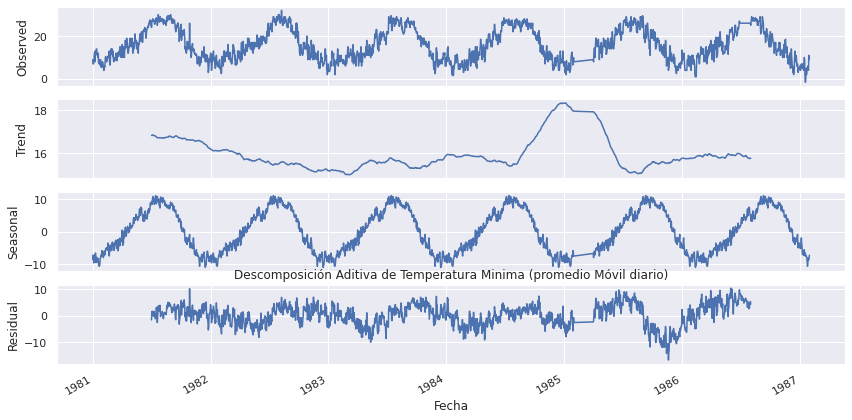

In [ ]:
#Caso: Uso de datos con promedio móvil diario.
#Descomposición de Series de Tiempo 
#Uso de la biblioteca 'statsmodel' (agregada en la celda 1)

#Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

#Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1981-01', '1987-01'

#Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

#Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_30.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Minima (promedio Móvil diario)')

Text(0.5, 1.0, 'Descomposición Aditiva de Evaporación (promedio Móvil 365 días)')

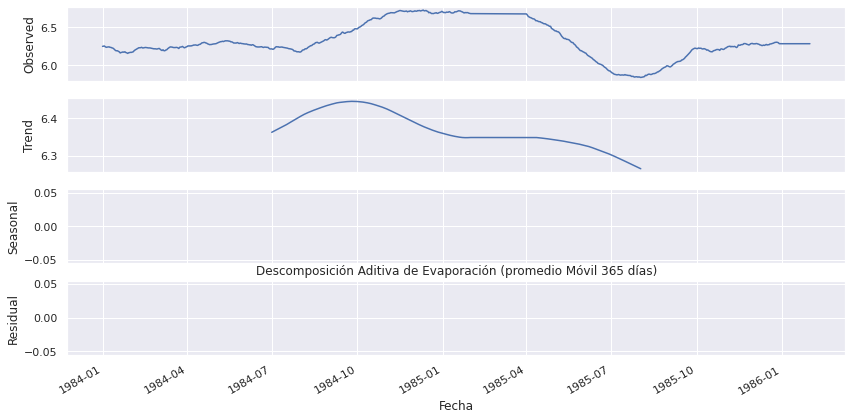

In [ ]:
#Caso: Uso de datos con promedio móvil de 365 días.
#Descomposición de Series de Tiempo 
#Uso de la biblioteca 'statsmodel' (agregada en la celda 1)

#Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

#Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1984-01', '1986-01'

#Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

#Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_30_365d.loc[start:end, 'Evap'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Evaporación (promedio Móvil 365 días)')

Text(0.5, 1.0, 'Descomposición Aditiva de Evaporación (promedio Móvil 30 días)')

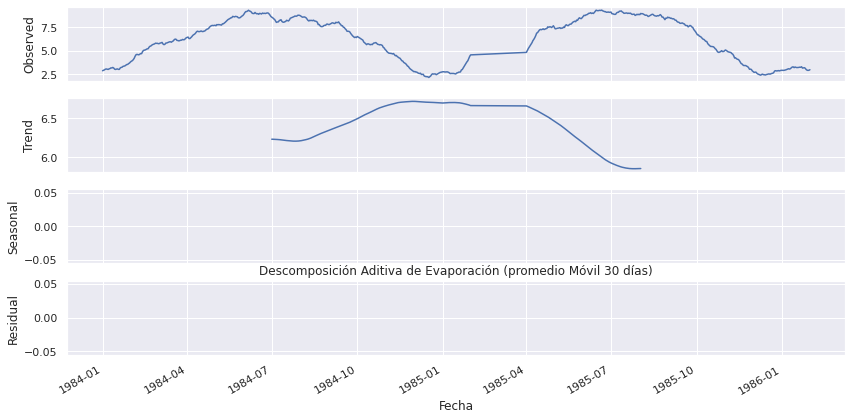

In [ ]:
#Caso: Uso de datos con promedio móvil de 30 días.
#Descomposición de Series de Tiempo 
#Uso de la biblioteca 'statsmodel' (agregada en la celda 1)

#Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

#Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1984-01', '1986-01'

#Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

#Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_30_30d.loc[start:end, 'Evap'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Evaporación (promedio Móvil 30 días)')

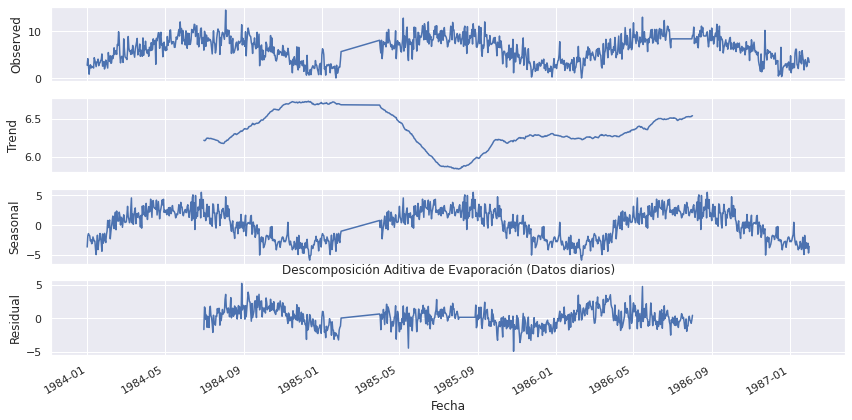

In [ ]:
#Caso: Uso de datos con promedio móvil diario.
#Descomposición de Series de Tiempo 
#Uso de la biblioteca 'statsmodel' (agregada en la celda 1)

#Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

#Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1984-01', '1987-01'

#Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

#Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_30.loc[start:end, 'Evap'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Evaporación (Datos diarios)');

**Actividad 6**

Por favor explora visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas de dos periodos de 30 años contiguos. Utiliza la función de Seaborn: sns.distplot. Agrega una línea vertical punteada indicando el valor del promedio de cada grupo de datos.

*Dado que se cuenta con 47 años de datos se usaran dos periodos (24 y 24 años)*

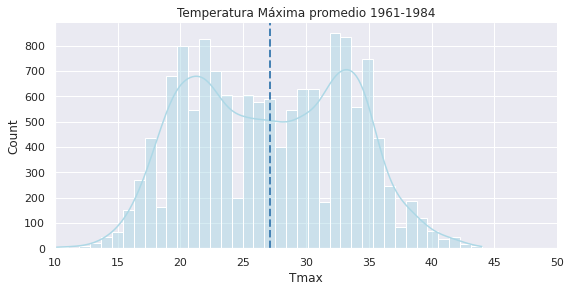

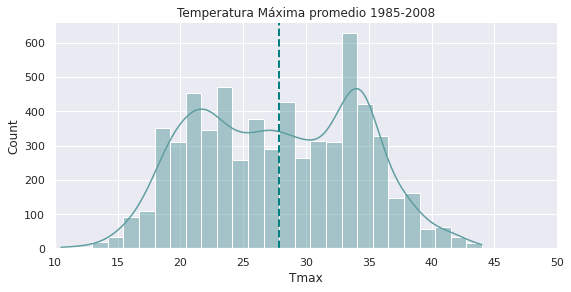

Tmax_promedio df_1 =  27.134929881337655 °C
Tmax_promedio df_2 =  27.829345228612393 °C


In [ ]:
# Gráfica de distribuciones de Temperaturas maxima 

g1 = sns.displot(df_1.Tmax, kde=True, color='lightblue', height=4, aspect=2)
plt.axvline(df_1.Tmax.mean(), linestyle='--', linewidth=2, color='steelblue')

g2 = sns.displot(df_2.Tmax, kde=True, color='cadetblue', height=4, aspect=2)
plt.axvline(df_2.Tmax.mean(), linestyle='--', linewidth=2, color='teal')

g1.set(title='Temperatura Máxima promedio 1961-1984')
g2.set(title='Temperatura Máxima promedio 1985-2008')
g1.set(xlim=(10,50))
g2.set(xlim=(10,50))

plt.show()

print('Tmax_promedio df_1 = ', df_1.Tmax.mean(), '°C' )
print('Tmax_promedio df_2 = ', df_2.Tmax.mean(), '°C' )

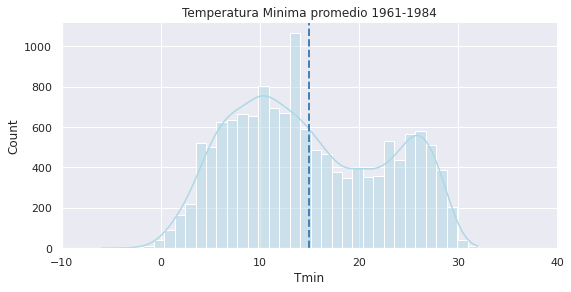

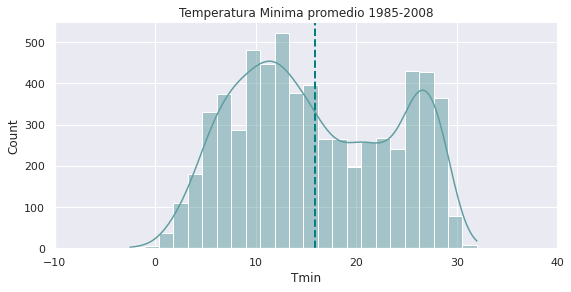

Tmin_promedio df_1 =  14.914784408909194 °C
Tmin_promedio df_2 =  15.941698172652803 °C


In [ ]:
# Gráfica de distribuciones de Temperaturas minima

g1 = sns.displot(df_1.Tmin, kde=True, color='lightblue', height=4, aspect=2)
plt.axvline(df_1.Tmin.mean(), linestyle='--', linewidth=2, color='steelblue')

g2 = sns.displot(df_2.Tmin, kde=True, color='cadetblue', height=4, aspect=2)
plt.axvline(df_2.Tmin.mean(), linestyle='--', linewidth=2, color='teal')

g1.set(title='Temperatura Minima promedio 1961-1984')
g2.set(title='Temperatura Minima promedio 1985-2008')
g1.set(xlim=(-10,40))
g2.set(xlim=(-10,40))

plt.show()

print('Tmin_promedio df_1 = ', df_1.Tmin.mean(), '°C' )
print('Tmin_promedio df_2 = ', df_2.Tmin.mean(), '°C' )

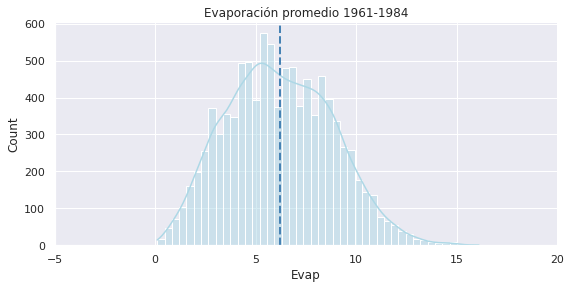

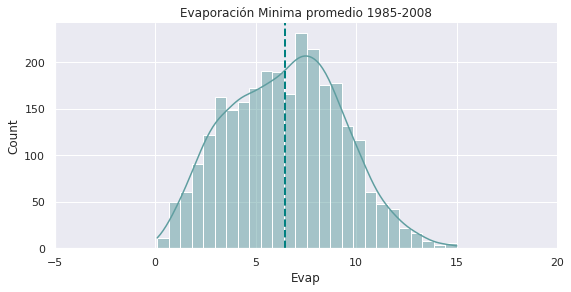

Evap_promedio df_1 =  6.194637547421289 mm
Evap_promedio df_2 =  6.461751982696479 mm


In [ ]:
# Gráfica de distribuciones de Evaporacion

g1 = sns.displot(df_1.Evap, kde=True, color='lightblue', height=4, aspect=2)
plt.axvline(df_1.Evap.mean(), linestyle='--', linewidth=2, color='steelblue')

g2 = sns.displot(df_2.Evap, kde=True, color='cadetblue', height=4, aspect=2)
plt.axvline(df_2.Evap.mean(), linestyle='--', linewidth=2, color='teal')

g1.set(title='Evaporación promedio 1961-1984')
g2.set(title='Evaporación Minima promedio 1985-2008')
g1.set(xlim=(-5,20))
g2.set(xlim=(-5,20))

plt.show()

print('Evap_promedio df_1 = ', df_1.Evap.mean(), 'mm' )
print('Evap_promedio df_2 = ', df_2.Evap.mean(), 'mm' )